In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
import zipfile
import os
import glob
import math


import matplotlib.pyplot as plt
from scipy.stats import entropy 
import shapely
import json
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from tqdm import tqdm
import scorers
import redistricting

In [9]:
data_path ="../data/mggg-states/"
output_dir = "../output/"
run_name = "equal_comp"
states = pd.read_csv("../states.csv")
DEGREE_LIMIT = 0
scoring = scorers.abs_diff_mean_fn
states

,state,abbrev,districts,file,dem_votes,rep_votes,population
0,Alabama,AL,7,NaN,NaN,NaN,NaN
1,Alaska,AK,1,NaN,NaN,NaN,NaN
2,Arizona,AZ,9,az_precincts,USH18D,USH18R,TOTPOP
3,Arkansas,AS,4,NaN,NaN,NaN,NaN
4,California,CA,52,NaN,NaN,NaN,NaN
5,Colorado,CO,8,CO_precincts,USH18D,USH18R,TOTPOP
6,Connecticut,CT,5,CT_precincts,USH18D,USH18R,TOTPOP
7,Delaware,DE,1,NaN,NaN,NaN,NaN
8,Florida,FL,28,NaN,NaN,NaN,NaN
9,Georgia,GA,14,GA_precincts,PRES16D,PRES16R,TOTPOP


In [10]:
# for i,s in states.iterrows():
#     if type(s["file"]) == float:
#         if math.isnan(s["file"]):
#             continue
    
#     with zipfile.ZipFile(os.path.join(data_path,f"{s['file']}.zip"), 'r') as zip_ref:
#         zip_ref.extractall(os.path.join(data_path,s["abbrev"]))

#     data = gpd.read_file(os.path.join(data_path,s["abbrev"]))
#     if not(s["dem_votes"] in data.columns):
#         print(s["state"], "missing column.")

    

3 Arizona
6 Colorado
7 Connecticut
10 Georgia
11 Hawaii
14 Indiana
15 Iowa
18 Louisiana
19 Maine
20 Maryland
21 Massachusetts
22 Michigan
23 Minnesota
27 Nebraska
29 New Hampshire
31 New Mexico
33 North Carolina
35 Ohio
36 Oklahoma
37 Oregon
38 Pennsylvania


100%|██████████| 360/360 [00:03<00:00, 118.48it/s]
c:\Users\yagne\anaconda3\envs\common\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


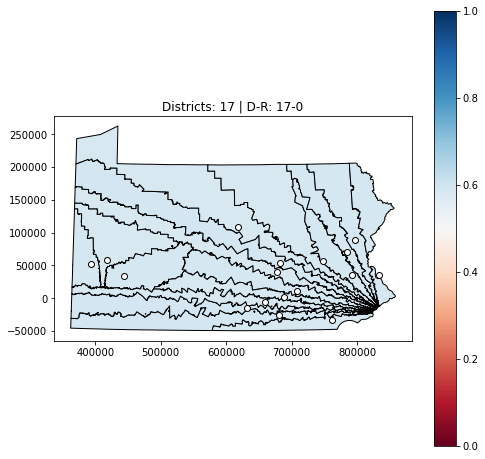

39 Rhode Island


C:\Users\yagne\AppData\Local\Temp\ipykernel_8500\1367625901.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  voting_precincts['REPRESENTATIVE_POINT'] =  voting_precincts.centroid # voting_precincts.representative_point() https://gis.stackexchange.com/a/414263
100%|██████████| 360/360 [00:02<00:00, 162.87it/s]
c:\Users\yagne\anaconda3\envs\common\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


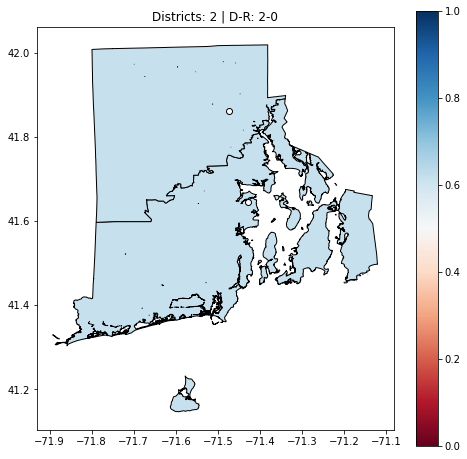

44 Utah


100%|██████████| 360/360 [00:03<00:00, 107.27it/s]
c:\Users\yagne\anaconda3\envs\common\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


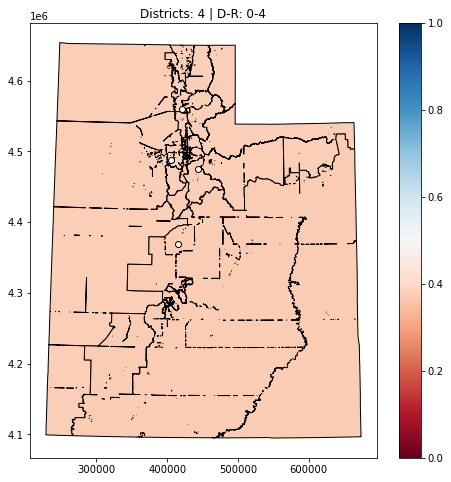

46 Virginia


100%|██████████| 360/360 [00:02<00:00, 154.31it/s]
c:\Users\yagne\anaconda3\envs\common\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


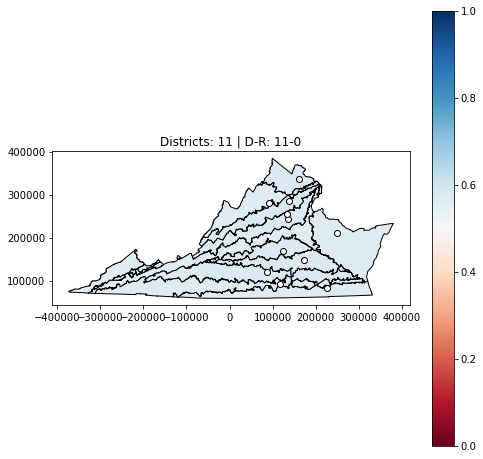

49 Wisconsin


100%|██████████| 360/360 [00:06<00:00, 58.16it/s]
c:\Users\yagne\anaconda3\envs\common\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


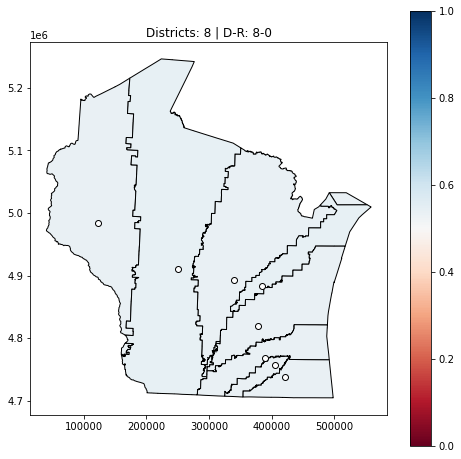

In [5]:
for i,s in states.iterrows():
    if type(s["file"]) == float:
        if math.isnan(s["file"]):
            continue
    
    print(i+1, s["state"])


    voting_precincts = gpd.read_file(os.path.join(data_path,s["abbrev"]))
    # voting_precincts = voting_precincts.to_crs("EPSG:4269")
    # voting_precincts = voting_precincts.dissolve(by="COUNTYFP", aggfunc="sum")
    n_districts = s["districts"]
    pop = s["population"]
    d_votes = s["dem_votes"]
    r_votes = s["rep_votes"]

    voting_precincts[pop] = voting_precincts[pop].astype(float)
    voting_precincts[d_votes] = voting_precincts[d_votes].astype(float)
    voting_precincts[r_votes] = voting_precincts[r_votes].astype(float)


    
    voting_precincts['REPRESENTATIVE_POINT'] =  voting_precincts.centroid # voting_precincts.representative_point() https://gis.stackexchange.com/a/414263
    voting_precincts['RP_LON'] = voting_precincts['REPRESENTATIVE_POINT'].apply(lambda p: p.x)
    voting_precincts['RP_LAT'] = voting_precincts['REPRESENTATIVE_POINT'].apply(lambda p: p.y)


    orig_voting = voting_precincts[[d_votes, r_votes]].sum()/(voting_precincts[[d_votes, r_votes]].sum().sum())

    holder = []   
    redistricting.split_this(df=voting_precincts, n_districts=n_districts, pop_col=pop, dem_col=d_votes, rep_col=r_votes, orig_dem=orig_voting[d_votes], orig_rep=orig_voting[r_votes], degree_limit=DEGREE_LIMIT, score_fn=scoring, holder=holder)

    all_districts = pd.concat(holder).reset_index(drop=True)
    split_columns = [c for c in all_districts.columns if c.startswith("SPLIT_")]

    for c in split_columns:
        all_districts[c] = all_districts[c].fillna(0)

    all_districts['DISTRICT'] = all_districts.apply(redistricting.splits_to_regions_binary, splits=split_columns, axis=1)

    n_districts = all_districts['DISTRICT'].nunique()
    random_districts = np.random.choice(np.linspace(0,n_districts-1,n_districts), size=n_districts, replace=False, p=None)
    shuffle_dict = dict(zip(all_districts["DISTRICT"].unique(), random_districts))
    all_districts["SHUFFLED"] = all_districts["DISTRICT"].apply(lambda x: shuffle_dict[x])

    os.makedirs(os.path.join(output_dir, s["abbrev"]),exist_ok=True)
    all_districts[['geometry', pop, r_votes, d_votes, 'DISTRICT', 'SHUFFLED'] + split_columns].to_file(os.path.join(output_dir, s["abbrev"],f"{s['abbrev']}_{run_name}.shp"))

    redistricting.split_review(input_df=all_districts, split=len(split_columns), split_cols=split_columns, d_votes=d_votes, r_votes=r_votes, pop=pop, plot_party=True, figsize=(8,8), save=os.path.join(output_dir, s["abbrev"],f"{s['abbrev']}_{run_name}.png"))
